In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [226]:
df = pd.read_csv("time_series_2019-ncov-Confirmed.csv")

In [227]:
df.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand       15       101        2        3        5   
1            NaN          Japan       36       138        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667     84.25        0        0        0   
4            NaN       Malaysia      2.5     112.5        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/13/20  3/14/20  3/15/20  3/16/20  \
0        7        8        8  ...       75       82      114      147   
1        2        4        4  ...      701      773      839      825   
2        3        4        5  ...      200      212      226      243   
3        1        1        1  ...        1        1        1        1   
4        3        4        4  ...      197      238      428      566   

   3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  
0      177      212      272      322      411      599  
1      878      889      924      963     1007     1086  
2      266      313      345      385      432      455  
3        1        1        1        1        1        2  
4      673      790      900     1030     1183     1306  

[5 rows x 65 columns]

In [228]:
df_copy = df.copy()

In [229]:
df_copy = df_copy.drop(columns=["Province/State","Country/Region","Lat","Long"])

In [230]:
fin = [(df_copy[df_copy >0].count() / df["Country/Region"].unique().shape[0])*100 >= 70]

In [231]:
x = (df_copy[df_copy >0].count()/df["Country/Region"].unique().shape[0])>=0.7

In [232]:
cou = []
for row in x.index: 
    if(x[row])==False:
        cou.append(row)

In [233]:
cou.extend(["Lat","Long"])

In [234]:
df_final =  df.drop(columns=cou)

In [235]:
df_final.shape

(487, 23)

In [236]:
df_final.head()

Province/State Country/Region  03-02-2020  03-03-2020  03-04-2020  \
0            NaN       Thailand          43          43          43   
1            NaN          Japan         274         293         331   
2            NaN      Singapore         108         110         110   
3            NaN          Nepal           1           1           1   
4            NaN       Malaysia          29          36          50   

   03-05-2020  03-06-2020  03-07-2020  03-08-2020  03-09-2020  ...  3/13/20  \
0          47          48          50          50          50  ...       75   
1         360         420         461         502         511  ...      701   
2         117         130         138         150         150  ...      200   
3           1           1           1           1           1  ...        1   
4          50          83          93          99         117  ...      197   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0       82      114      147      177      212      272      322      411   
1      773      839      825      878      889      924      963     1007   
2      212      226      243      266      313      345      385      432   
3        1        1        1        1        1        1        1        1   
4      238      428      566      673      790      900     1030     1183   

   3/22/20  
0      599  
1     1086  
2      455  
3        2  
4     1306  

[5 rows x 23 columns]

# Country Wise

In [266]:
dc ={}
for i in range(df_final.shape[0]):
    dum = df_final.iloc[i,2:]
    dc[df_final.iloc[i][1]] = sum(dum)

In [267]:
plt.figure(figsize=(180, 110))
plt.bar(dc.keys(), dc.values(), color = 'red')
plt.xlabel("Countries")
plt.ylabel("Count")
plt.title("Confirmed Cases Based on the Countries")
plt.show()

In [268]:
plt.figure(figsize=(200, 100))
plt.pie(dc.values(),labels = dc.keys(),autopct='%1.2f%%')
plt.title("Confirmed Cases Based on the Countries", size = 30)
plt.legend(dc.keys(),prop={'size': 50})


# Date wise

In [269]:
# date_wise ={}
# for i in range(df_final.shape[1]):
#     dc[df_final.iloc[i][1]] = df_final.iloc[i,2:].sum()

In [270]:
dates = df_final.columns[2:]

In [271]:
date_wise ={}
for i in dates:
    date_wise[i] = df_final[i].sum()

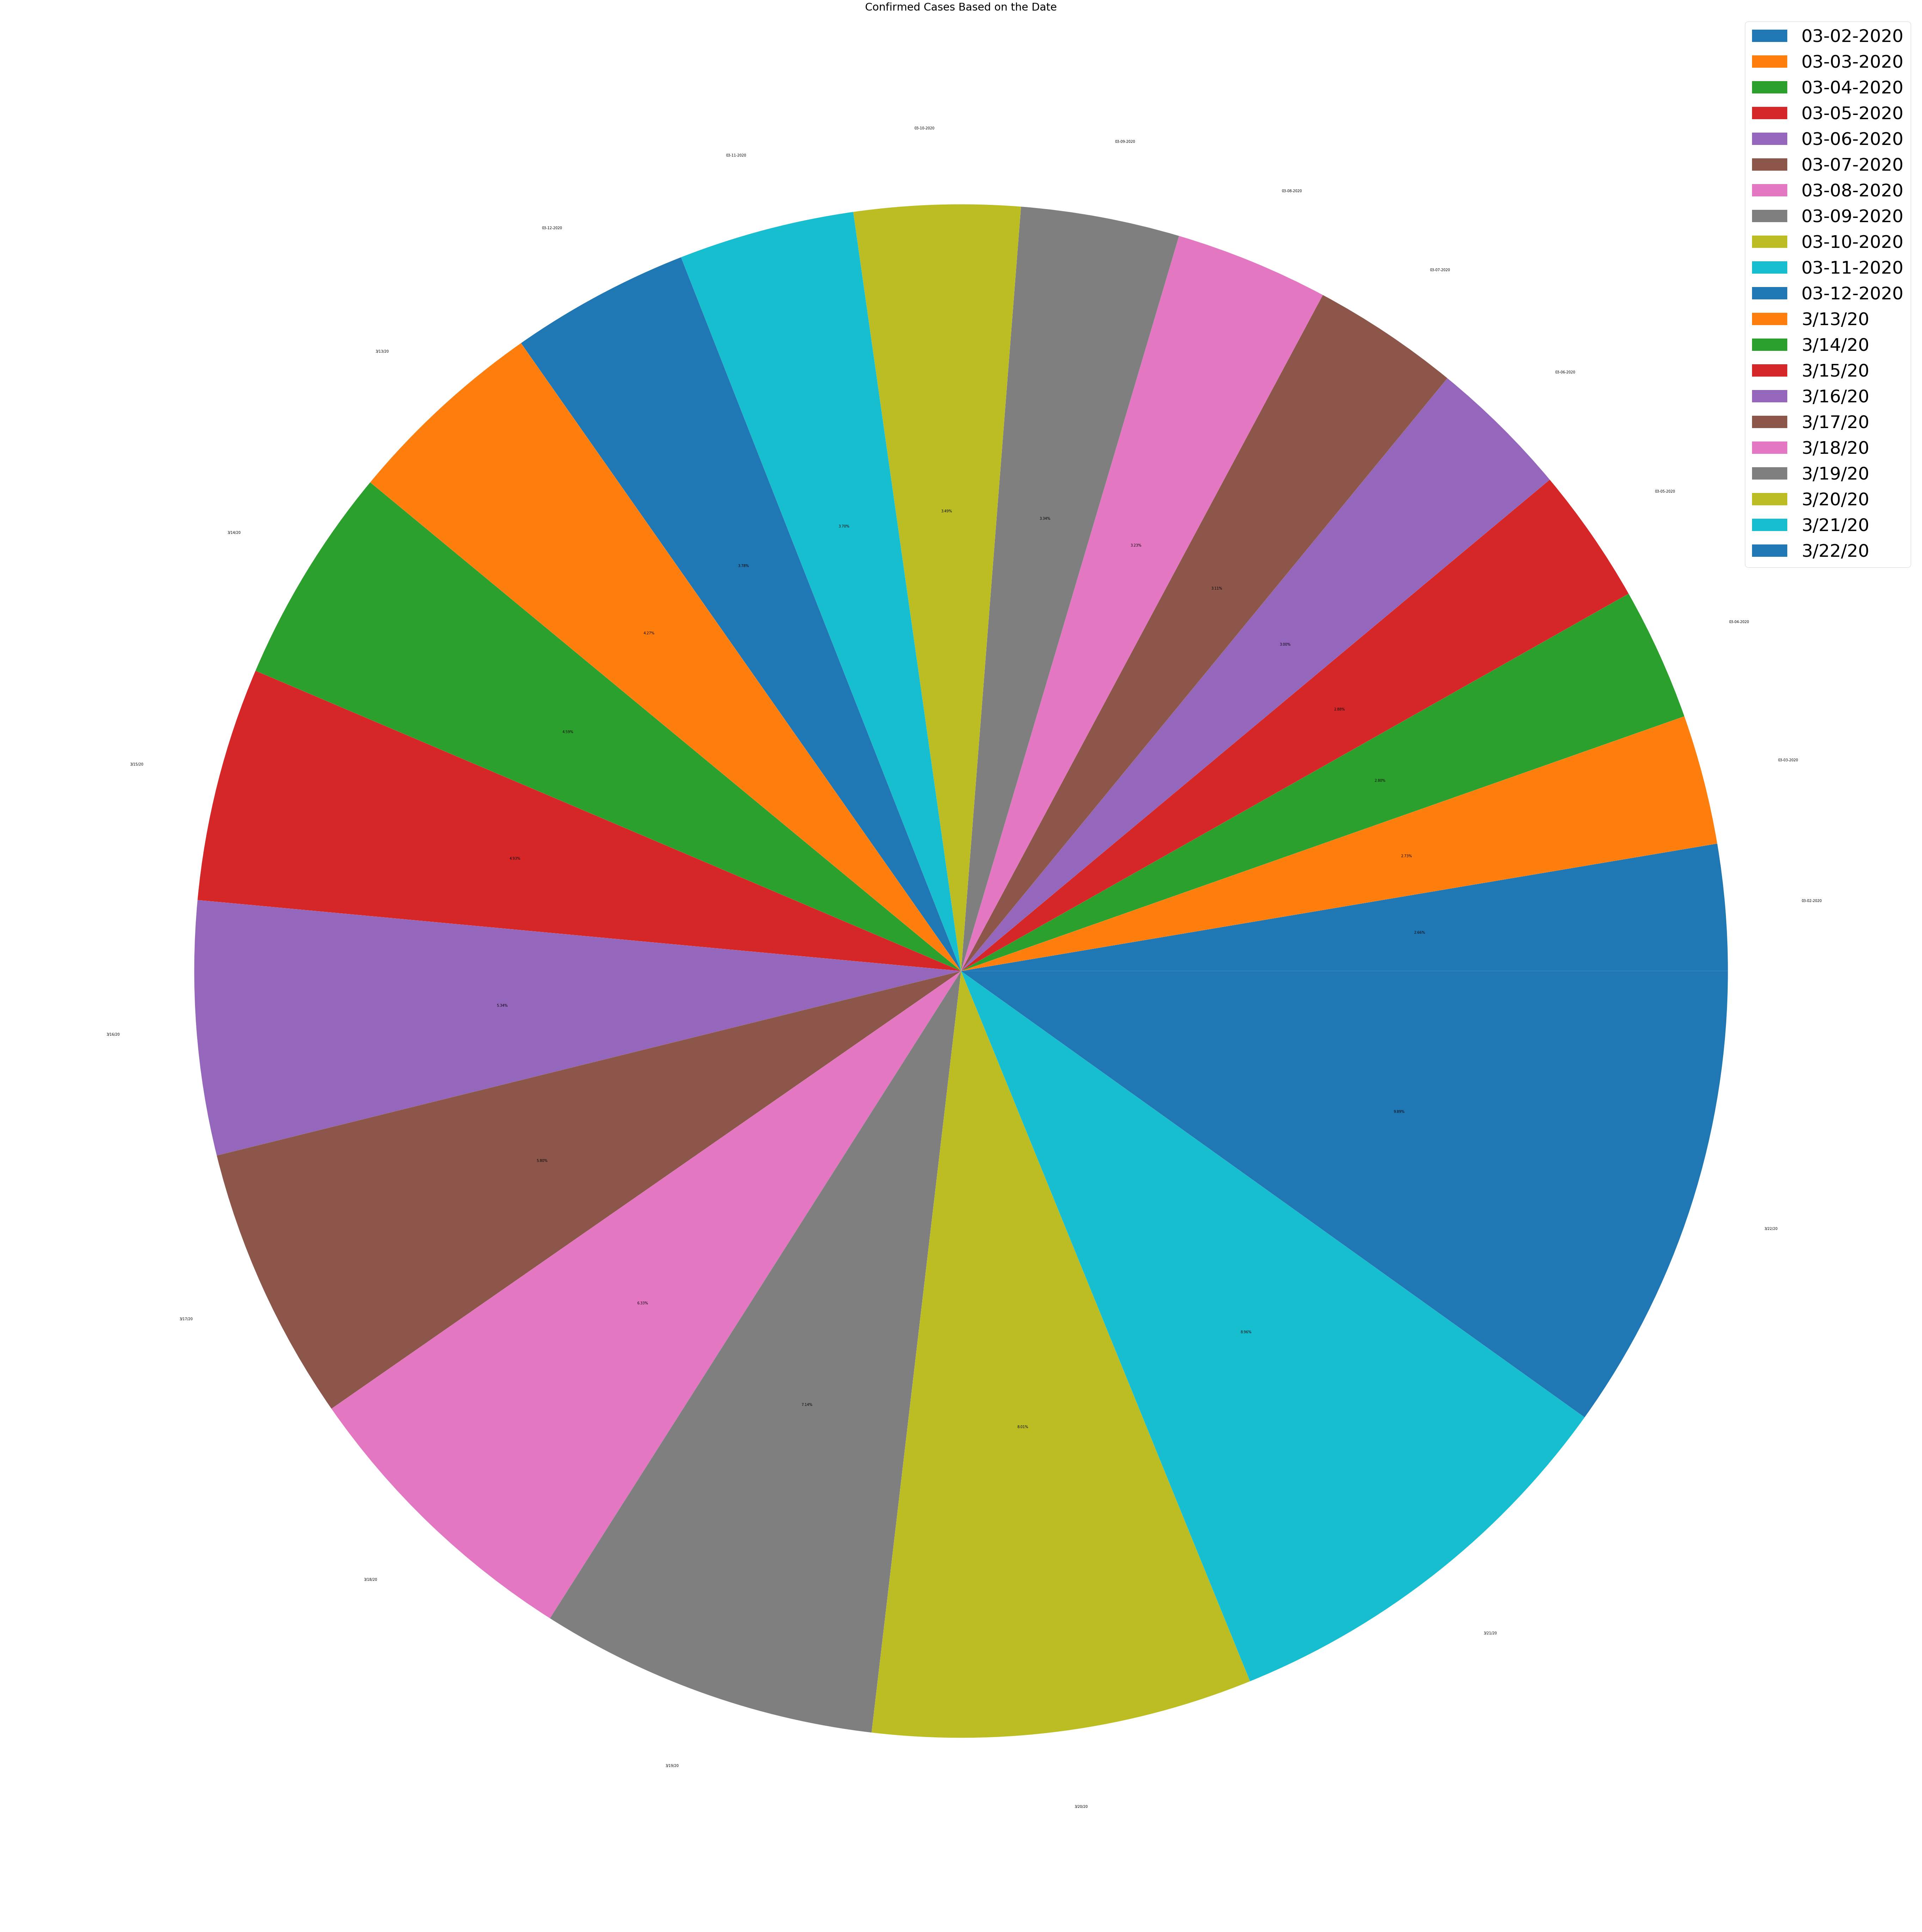

In [272]:
plt.figure(figsize=(200, 100))
plt.pie(date_wise.values(),labels = date_wise.keys(),autopct='%1.2f%%')
plt.title("Confirmed Cases Based on the Date", size = 30)
plt.legend(date_wise.keys(),prop={'size': 50})

In [273]:
plt.figure(figsize=(180, 110))
plt.bar(date_wise.keys(), date_wise.values(), color = 'red')
plt.xlabel("Dates",size= 100)
plt.ylabel("Count",size= 100)
plt.title("Confirmed Cases Based on the Dates",size= 250)
plt.show()

# Contenent wise

In [274]:
df_cont = pd.read_csv("c2c.csv")

In [275]:
df_cont.columns

Index(['Continent', 'Country'], dtype='object')

In [276]:
df_cont.head

<bound method NDFrame.head of          Continent    Country
0           Africa    Algeria
1           Africa     Angola
2           Africa      Benin
3           Africa   Botswana
4           Africa    Burkina
..             ...        ...
189  South America   Paraguay
190  South America       Peru
191  South America   Suriname
192  South America    Uruguay
193  South America  Venezuela

[194 rows x 2 columns]>

In [277]:
dc

{'Thailand': 2967,
 'Japan': 13896,
 'Singapore': 4606,
 'Nepal': 22,
 'Malaysia': 8295,
 'Canada': 2,
 'Australia': 48,
 'Cambodia': 337,
 'Sri Lanka': 462,
 'Germany': 135392,
 'Finland': 3828,
 'United Arab Emirates': 1664,
 'Philippines': 2167,
 'India': 2284,
 'Italy': 433159,
 'Sweden': 15476,
 'Spain': 157197,
 'Belgium': 17895,
 'Egypt': 2332,
 'Lebanon': 1713,
 'Iraq': 2171,
 'Oman': 515,
 'Afghanistan': 242,
 'Bahrain': 3541,
 'Kuwait': 2056,
 'Algeria': 985,
 'Croatia': 1150,
 'Switzerland': 39105,
 'Austria': 17682,
 'Israel': 5548,
 'Pakistan': 3342,
 'Brazil': 5589,
 'Georgia': 491,
 'Greece': 4530,
 'North Macedonia': 472,
 'Norway': 18350,
 'Romania': 2513,
 'Estonia': 2327,
 'San Marino': 1518,
 'Belarus': 544,
 'Iceland': 3426,
 'Lithuania': 409,
 'Mexico': 1116,
 'New Zealand': 286,
 'Nigeria': 106,
 'Ireland': 4174,
 'Luxembourg': 2896,
 'Monaco': 91,
 'Qatar': 4916,
 'Ecuador': 2280,
 'Azerbaijan': 411,
 'Armenia': 885,
 'Dominican Republic': 533,
 'Indonesia': 259

In [281]:
dict_cont = dict()
for i in dc:
    dummy = df_cont.loc[df_cont["Country"] == i]
    if(len(dummy)>0):
        dict_cont[dummy.iloc[0][0]] = dict_cont.get(dummy.iloc[0][0],0)+dc[i]

In [282]:
dict_cont

{'Asia': 295431,
 'North America': 2646,
 'Oceania': 53,
 'Europe': 881995,
 'Africa': 5469,
 'South America': 15366}

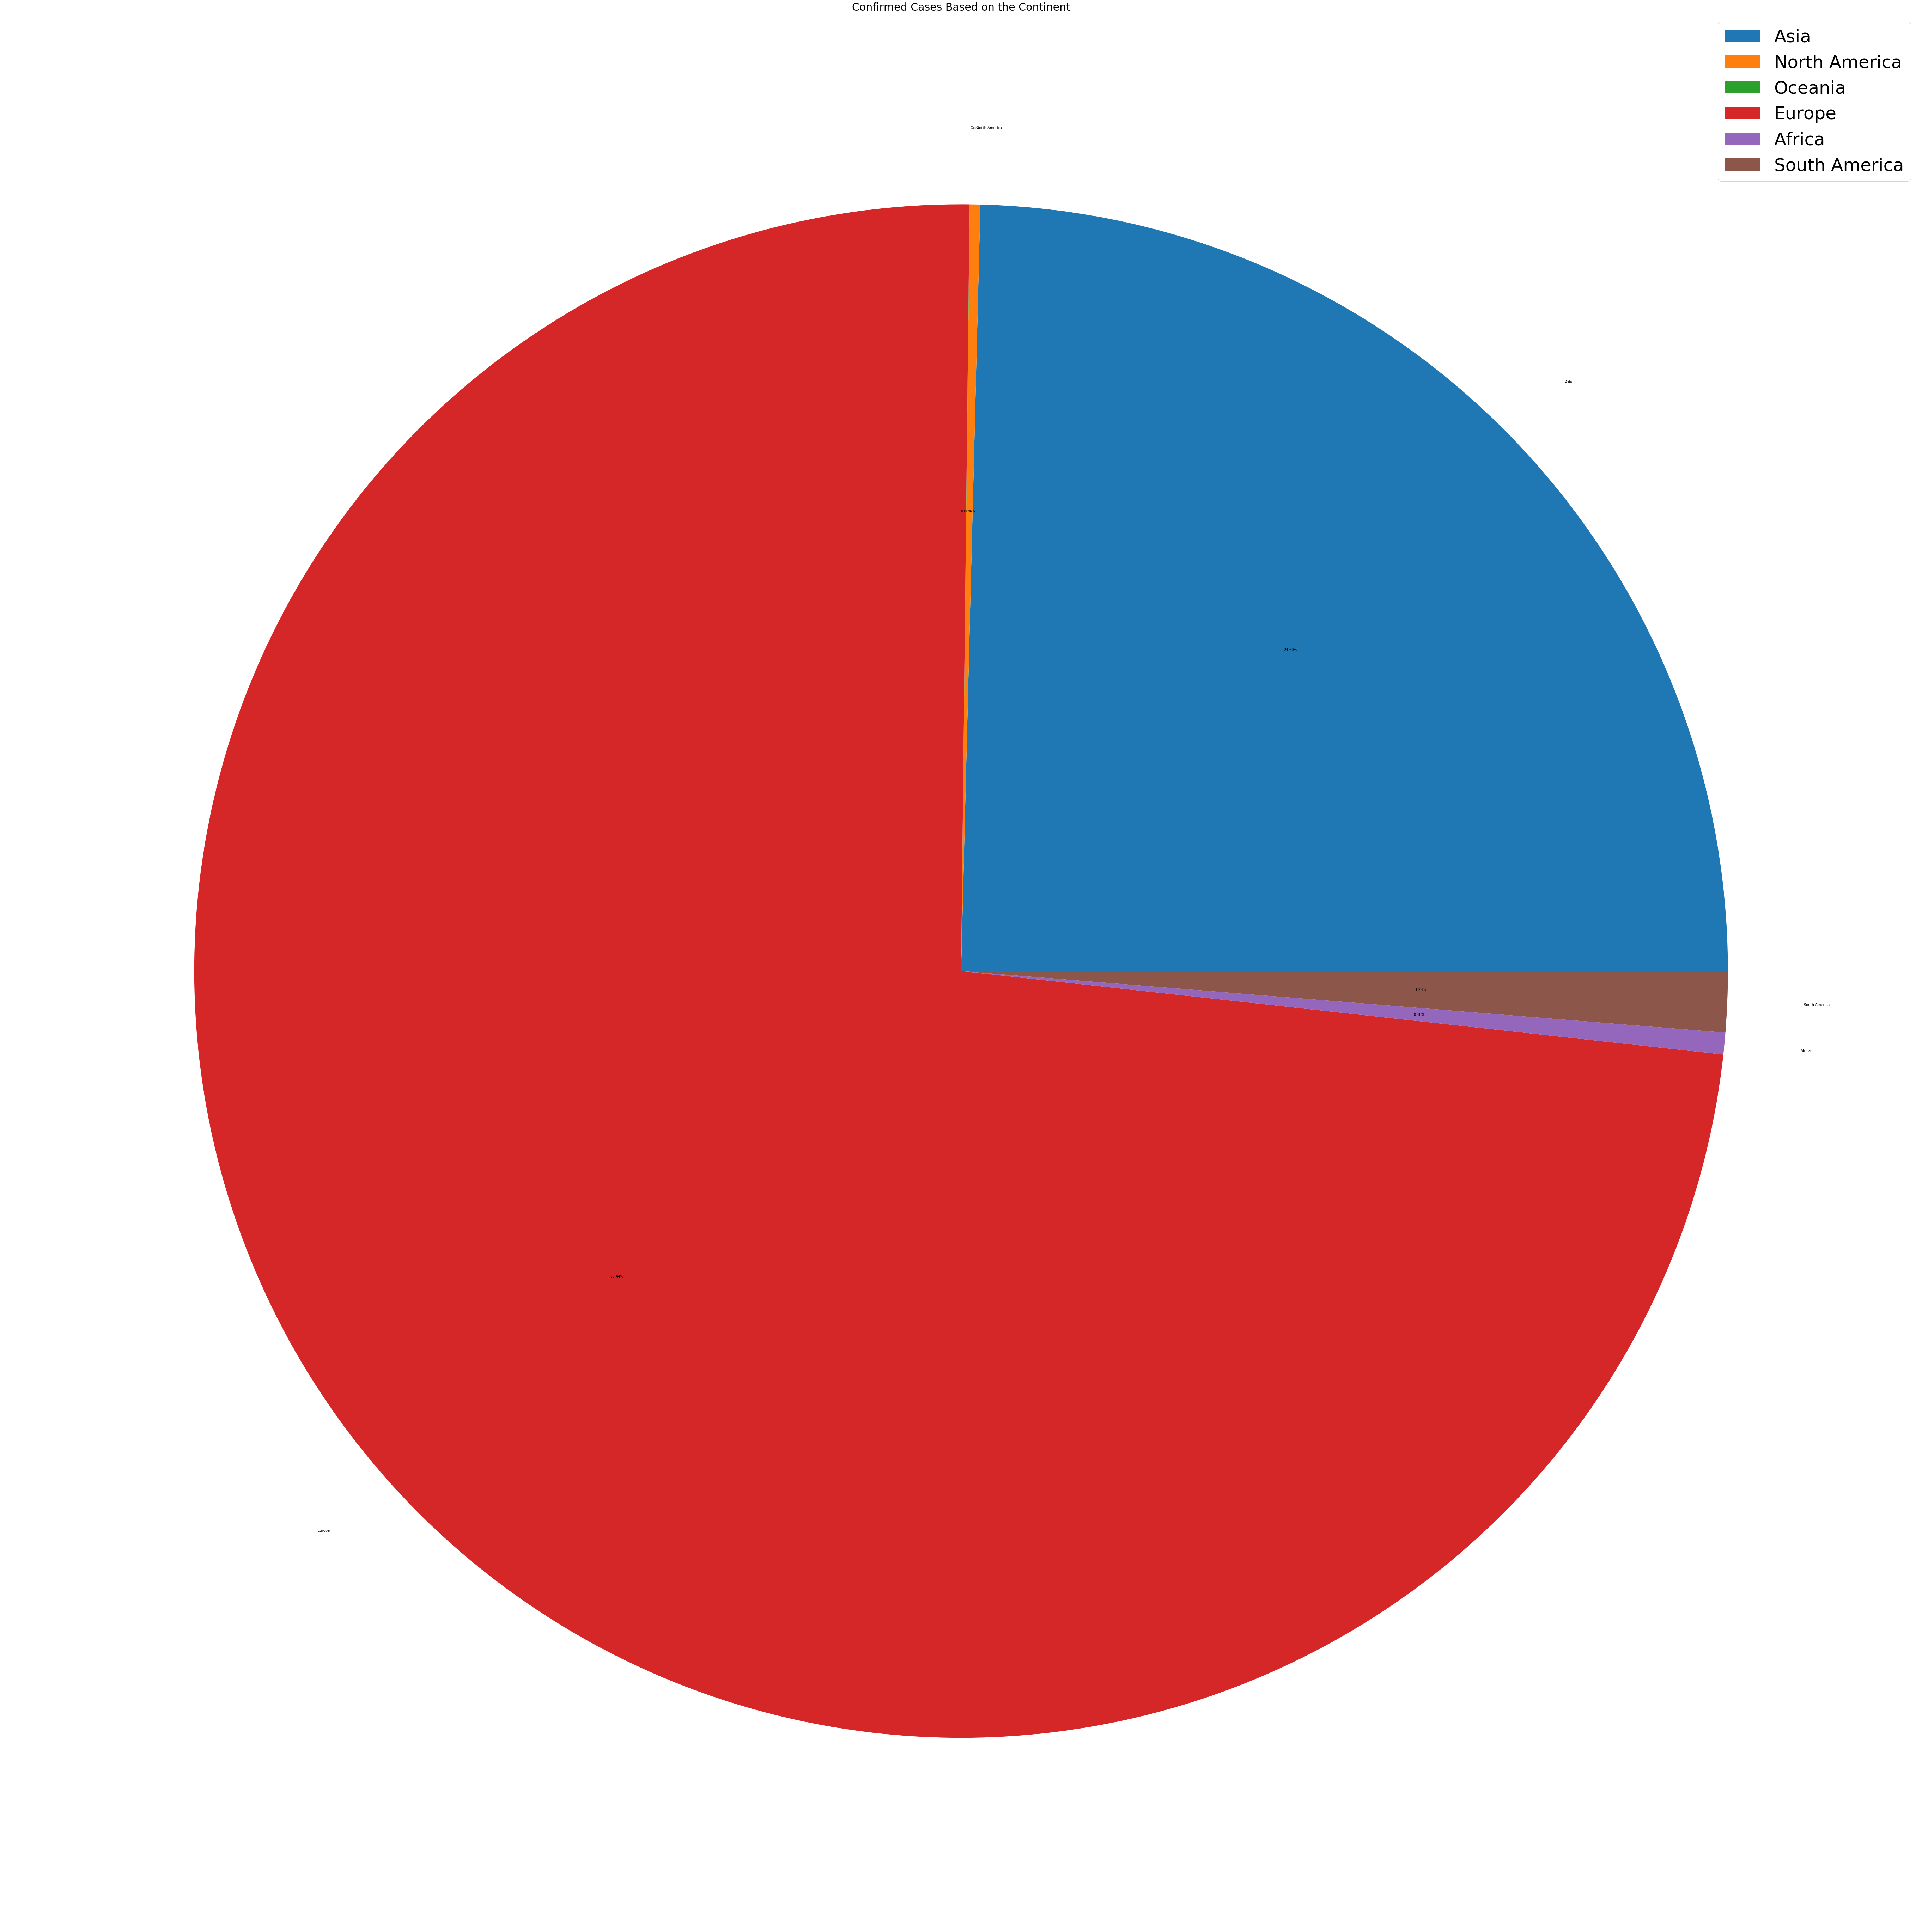

In [283]:
plt.figure(figsize=(200, 100))
plt.pie(dict_cont.values(),labels = dict_cont.keys(),autopct='%1.2f%%')
plt.title("Confirmed Cases Based on the Continent", size = 30)
plt.legend(dict_cont.keys(),prop={'size': 50})

In [284]:
plt.figure(figsize=(180, 110))
plt.bar(dict_cont.keys(), dict_cont.values(), color = 'red')
plt.xlabel("Contenent",size= 100)
plt.ylabel("Count",size= 100)
plt.title("Confirmed Cases Based on the Contenents",size= 250)
plt.show()